## EEE4114F: Computer assignment 2 ##

Work through each of the following questions, and satisfy yourself that
you understand the content and can do what is required.  If you're using Python then 
you can work inside the Jupyter notebook provided (just make more code cells as required), 
or from outside using a Python editor or IDE.

1.  **Simple difference equation**

    1.  Create vectors $\mathbf{b}$ and $\mathbf{a}$ that contain the
        coefficients of $x[n]$ and $y[n]$, respectively, in the
        following difference equation:
        $$y[n] + 0.9y[n-2] = 0.3x[n] + 0.6x[n-1] + 0.3x[n-2].$$

    2.  Calculate $y[n]$ analytically for $x[n] = \delta[n]$, assuming
        that the system is causal.

    3.  Now create a unit impulse vector, `imp`, of length 128. Generate
        the first 128 points of the impulse response of the filter
        satisfying the above difference equation, again making the
        assumption of causality. Use `stem` to plot these values as a
        discrete-time signal versus time. It may help
        to plot just the first 10 or 20 points.

    4.  Using the `subplot` command, show the impulse
        sequence on one set of axes and the filter response on a set of
        axes below. Use the same range for the x-variable in both cases.

<StemContainer object of 3 artists>

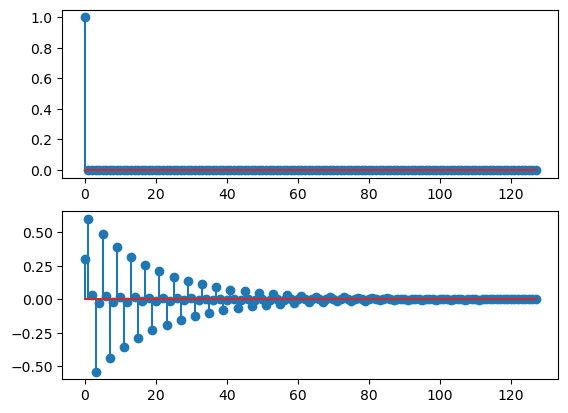

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([0.3,0.6,0.3])
b = np.array([1.0,0.0,0.9])


imp = np.zeros(128)
imp[0]=1

y = np.zeros(128)
y[0]=0.3*imp[0]+0.6*imp[0-1]+0.3*imp[0-2]-0.9*y[0-2]
y[1]=0.3*imp[1]+0.6*imp[1-1]+0.3*imp[1-2]-0.9*y[1-2]
y[2]=0.3*imp[2]+0.6*imp[2-1]+0.3*imp[2-2]-0.9*y[2-2]

for i in np.arange(3,len(y)):
    #y[i]=0.3*imp[i]+0.6*imp[i-1]+0.3*imp[i-2]-0.9*y[i-2]
    #c = np.array([imp[i],imp[i-1],imp[i-2]])
    c = imp[i:i-3:-1]
    d = y[i:i-3:-1]
    y[i]= np.sum(b*c)-0.9*y[i-2]



#plt.stem(imp)
fig, axs = plt.subplots(2)

axs[0].stem(imp)
axs[1].stem(y)

2.  **Impulse response with `lfilter`**

    1.  Use the `scipy.signal.lfilter` function to generate and plot the impulse
        response $h[n]$ of the following difference equation:
        $$y[n] - 1.8 \cos\left(\frac{\pi}{16}\right) y[n-1] + 0.81 y[n-2]
              = x[n] + \frac{1}{2} x[n-1].$$ Plot $h[n]$ in the range of
        $-10 \leq n \leq 100$.

    2.  Also determine the impulse response analytically and confirm
        your results.

-10.0


<StemContainer object of 3 artists>

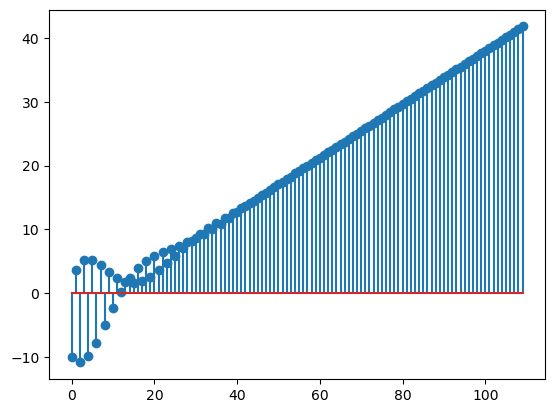

In [9]:
import scipy
nv = np.arange(-10,100)
a = np.array([1,1.8*np.cos(np.pi/16),0.81])
b = np.array([1,0.5,0])
h = scipy.signal.lfilter(b,a,nv)
print(h[0])
plt.stem(h)

3.  **Frequency response of rational transfer function filters** 

    The `scipy` package has a function `scipy.signal.freqz`.  This function 
    takes the filter coefficients $\mathbf{a}=(a[0], \cdots, a[N])$ and 
    $\mathbf{b} = (b[0], \cdots, b[M]]$, and calculates the frequency response
    $$H(e^{j \omega}) = \frac{b[0] + b[1] e^{-j \omega} + \cdots +
          b[M] e^{-j \omega M}}{a[0] + a[1] e^{-j \omega} + \cdots +
          a[N] e^{-j \omega N}}$$ at $N$ frequency points around the
    unit circle. Note that this response corresponds to the LCCDE
    equation 
    $$
        a[0] y[n] + a[1] y[n-1] + \cdots + a[N] y[n-N] = 
        b[0] x[n] + b[1] x[n-1] + \cdots + b[M] x[n-M].
    $$

    Consider the difference equation from the previous question.  The
    system function is rational:
    $$H(z) = \frac{1 + \frac{1}{2}z^{-1}}{1 - 1.8\cos(\pi/16)z^{-1} +
          0.81z^{-2}}.$$ The `freqz` function can be used to find the
    frequency response, since evaluating the z-transform on the unit
    circle is equivalent to finding points on the DTFT.

    1.  Write a function `myfreqz` that emulates the behaviour of the
        function `freqz`. Use this to make plots of the magnitude and
        phase of the system specified above, with 512 frequency samples
        around the entire unit circle. Note that for a complex sequence
        `x`, `abs(x)` can be used to find the magnitude, and `angle(x)`
        the phase.

    2.  Is this a highpass, lowpass, allpass, bandpass, or bandstop
        filter?

    3.  Use your function to make a plot (on two axes on the same figure, using
        ` subplot`) of the magnitude and phase of the frequency response
        (for $\omega$ from $0$ to $2\pi$) of 
        $$
              y[n] + 0.13 y[n-1] + 0.52 y[n-2] + 0.3 y[n-3] =
              0.16 x[n] - 0.48 x[n-1] + 0.48 x[n-2] - 0.16 x[n-3].    
        $$

4.  **Computing the DTFT of a finite-length signal** 

    The DTFT of a signal $x[n]$ is
    $$X(e^{j \omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j \omega n}.$$
    This is valid for infinitely long signals, which is a problem if a computer is
    to represent such a signal numerically. However,
    for finite-duration signals the sum terminates at some limits, and
    we can calculate the value of the sum.

    Additionally, the DTFT is a function of the continuous variable
    $\omega$, which can also not be represented numerically.
    Nonetheless, we can evalate samples of the DTFT at a discrete set of
    points, for example at evenly spaced frequencies over the interval
    $0$ to $2\pi$.

    The DTFT of a finite-duration signal (occupying the range $0$ to
    $L-1$ can therefore be calculated at frequencies $w_k = 2 \pi k/N$
    using the formula
    $$X(e^{j \omega_k}) = X(e^{j 2 \pi k/N}) = \sum_{n=0}^{L-1} x[n]
        e^{-j (2 \pi k/N) n}$$ for $k=0, 1, \ldots, N-1$.

    1.  Write a function `[H,W] = DTFT(h, N)` that computes the DTFT of
        the finite-length signal contained in the vector `h`. The values
        in this vector are $h=(h[0], h[1], \cdots, h[L-1])$, and the signal
        is assumed to have zero values for $n<0$ and $n \geq L$. The 
        function must evaluate the DTFT at $N$
        equally-spaced frequency points, which are returned in the
        vector `W`. The values of the DTFT samples must be returned in
        `H`.

    2.  Use the function just written to find the DTFT of the
        finite-length pulse 
        $$
        r[n] = \begin{cases}
                1 \qquad & 0 \leq n < L \\
                0 \qquad & \text{elsewhere}
               \end{cases}
        $$ for $L=12$. Choose the number of frequency
        samples to be 5 to 10 times the pulse width. Plot the magnitude
        and phase of the frequency response obtained on two different
        sets of axes (using `subplot`).

        Recall that the analytical solution to this problem is
        $$R(e^{j \omega}) = \frac{\sin(\omega L/2)}{\sin(\omega/2)} e^{-j
                \omega (L-1)/2}.$$ Confirm that this expression gives
        the same results.

    3.  Notice that the zeros of the frequency response are at
        regularly-spaced locations. Repeat the DTFT calculation and
        magnitude plot for $L=15$ (an odd-length pulse) and check the
        zero locations. What is a general formula for the locations of
        the zeros?

    4.  Make plots of the magnitude and phase response for the following signals:

        1.  A rectangular pulse with length $L=16$.

        2.  A triangular pulse of the form $$w_t[n] = \begin{cases}
                      2 n/L \qquad & 0 \leq n \leq L/2 \\
                      2 - 2 n/L \qquad & L/2 < n < L,
                    \end{cases}$$ also with $L=16$. The magnitude plot
            should be expressed in dBs:
            $20 \log_{10} |H(e^{j \omega})|$. Comment on the difference
            in the resulting mainlobe width (the first zero in the
            frequency response) and the magnitude of the ripple at
            higher frequencies.

In [3]:
print(np.exp(1))

2.718281828459045


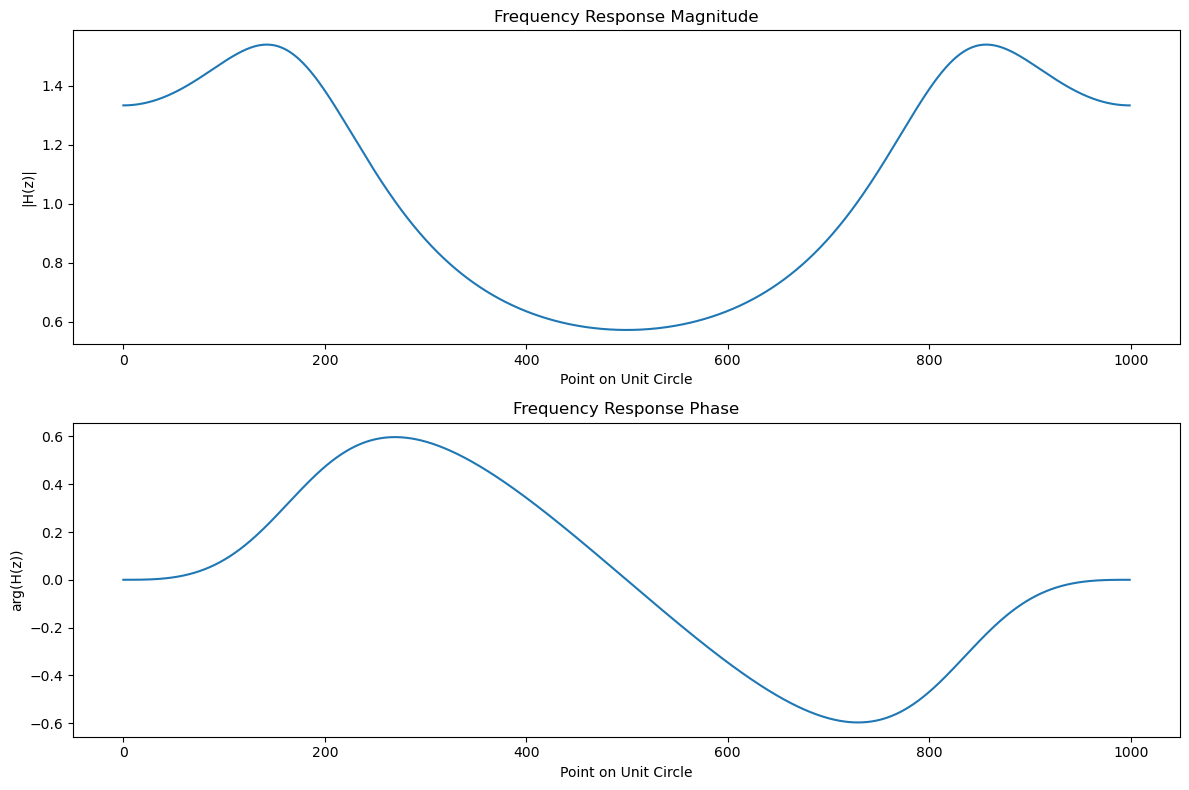

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def transfer_function(numerator, denominator, z):
    num_eval = numerator(z)
    den_eval = denominator(z)
    return num_eval / den_eval

# Define the system transfer function coefficients
numerator = Polynomial([1])  # Numerator coefficients
denominator = Polynomial([1, -0.5, 0.25])  # Denominator coefficients

# Define the range of frequencies (on the unit circle) to evaluate the frequency response
num_points = 1000
unit_circle_points = np.exp(1j * np.linspace(0, 2 * np.pi, num_points))

# Evaluate the frequency response at each point on the unit circle
frequency_response = np.array([transfer_function(numerator, denominator, z) for z in unit_circle_points])

# Plotting magnitude and phase
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(np.abs(frequency_response))
plt.title('Frequency Response Magnitude')
plt.xlabel('Point on Unit Circle')
plt.ylabel('|H(z)|')

plt.subplot(2, 1, 2)
plt.plot(np.angle(frequency_response))
plt.title('Frequency Response Phase')
plt.xlabel('Point on Unit Circle')
plt.ylabel('arg(H(z))')

plt.tight_layout()
plt.show()
